In [37]:
# mailroom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

Avg: 1717.2108786093409 seconds


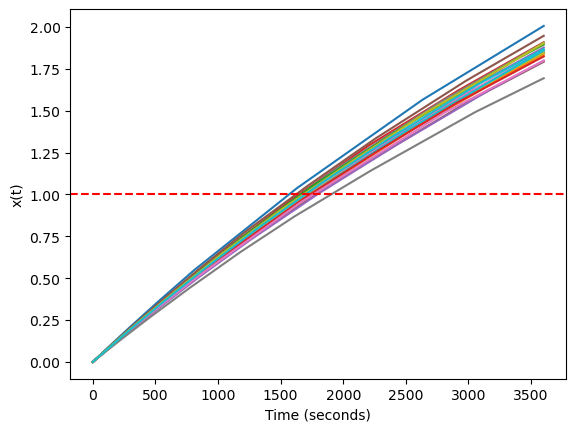

In [39]:
np.random.seed(42)

# assumption: assigned seating

k = 100 # plane capacity, assumed to always be filled once boarding ends
totalBoardingTimes = [] # store our total boarding times 

luggage_effect = 1/98.3 # effect of one luggage = 1 less person boarded per 98 seconds
                    # 0.9 chance that someone will have a suitcase
conges_effect = 1/207.798 # effect of one person taking longer due to congestion = 1 less person boarded per 90 seconds
                    # on average, 7/18 chance someone needs to get past someone else to get to their seat
disob_effect = 1/90 # effect of one disobedient passenger = 1 less person boarded per 37.5 seconds
                    # 30% of passengers are late for their flights


def dxdt(t, X, a, b, c, d):
    subtractor = (np.random.normal(b, 0.05) * X * luggage_effect +
                  np.random.normal(c, 0.05) * X * conges_effect +
                  np.random.normal(d, 0.05) * X * disob_effect) 
    
    dX_dt = (a - (subtractor if subtractor < a else a)) / k
    
    return [dX_dt]

t_span = (0, 3601)


for i in range(20):
    sol = solve_ivp(dxdt, t_span, [0], args=(1/np.random.normal(15, 0.5), 0.9, 7/18, 0.3))
    plt.plot(sol.t, sol.y[0])

    interp_func = interp1d(sol.y[0], sol.t, kind='linear', fill_value="extrapolate") # y-value comes first since we are inputting y=1
    totalBoardingTimes.append(interp_func(1))

print(f'Avg: {np.mean(totalBoardingTimes)} seconds')

plt.axhline(y = 1, c='r', linestyle='--')
plt.xlabel('Time (seconds)')
plt.ylabel('x(t): Proportion of Plane Boarded')
plt.show()